<a href="https://colab.research.google.com/github/jamesluttringer2019/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import pandas as pd
from scipy import stats

In [0]:
#import data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-11-05 20:32:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-05 20:32:29 (127 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
#read in the dataset and format it
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voters = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

voters.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#make responses numeric, -1 = n, nan = 0, 1 = y
voters = voters.replace({'y':1, 'n':-1, np.nan:0})
voters.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
#split into republican and democrat dataframes
rep = voters[voters['party']=='republican']
dem = voters[voters['party']=='democrat']

In [0]:
#create confidence interval function
def confidence_int(data, confidence=.95):
  '''Function returns a confidence interval for given data around a sample mean'''
#convert data to np array
  data = np.array(data)
#take the mean of the data and get the length
  mean = np.mean(data)
  n = len(data)
#calculate standard error by dividing SAMPLE std deviation by sqrt n (s/sqrt(n))
  stderror = np.std(data, ddof=1)/np.sqrt(n)
#calculate the margin of error by multiplying std error by the t statistic for
# our desired level of accuracy (95%) with n-1 degrees of freedom
  moe = stderror*stats.t.ppf((1+confidence)/2.0,n-1)
#return the confidence interval in order of (lower bound, mean, upper bound)
  return (mean-moe,mean,mean+moe)

In [0]:
#calculate the confidence interval for republican and democrat votes on
#the immigration bill
CIRep = confidence_int(rep['immigration'])
CIDem = confidence_int(dem['immigration'])
print(CIRep)
CIDem

(-0.03731913888511405, 0.1130952380952381, 0.26350961507559023)


(-0.17580234143603218, -0.056179775280898875, 0.06344279087423443)

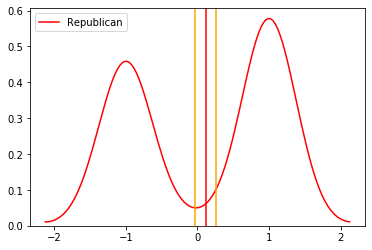

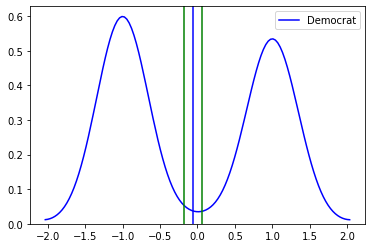

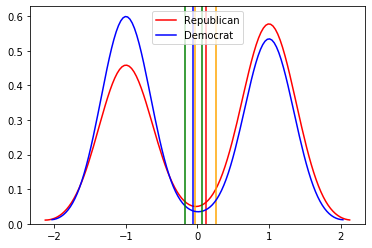

In [0]:
# create a density plot of the data for each party's votes on the immigration
# bill, and plot the confidence interval for each 
import seaborn as sns
import matplotlib.pyplot as plt
#republican plot
sns.kdeplot(rep['immigration'],color='red',label='Republican')

plt.axvline(x=CIRep[0],color='orange')
plt.axvline(x=CIRep[1],color='red')
plt.axvline(x=CIRep[2],color='orange')

plt.show()
#democrat plot
sns.kdeplot(dem['immigration'],color='blue',label='Democrat')

plt.axvline(x=CIDem[0],color='green')
plt.axvline(x=CIDem[1],color='blue')
plt.axvline(x=CIDem[2],color='green')

plt.show()
#combine into one plot
sns.kdeplot(rep['immigration'],color='red',label='Republican')

plt.axvline(x=CIRep[0],color='orange')
plt.axvline(x=CIRep[1],color='red')
plt.axvline(x=CIRep[2],color='orange')

sns.kdeplot(dem['immigration'],color='blue',label='Democrat')

plt.axvline(x=CIDem[0],color='green')
plt.axvline(x=CIDem[1],color='blue')
plt.axvline(x=CIDem[2],color='green')
plt.show()

The Republican and Democrat data graphs both show strongly opposing, yet well balanced opinions within each party. From this we can determine that there is no significant evidence of a connection between a voter's party and their vote on the immigration bill. Since the confidence intervals for the Republican and Democrat data overlap (as seen in the third graph), we can conclude with 95% confidence that there is not a statistically significant difference between the parties' opinions, thus further supporting the claim that neither party had a significant bias either in favor of, or against the bill. Therefore resulting in an overall neutral congressional opinion on the immigration bill.

##$\chi^{2}$ Test 



In [0]:
#read in adult data from UCI
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,names=column_headers)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
adult['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [0]:
#categorize hours-per-week
cut_points = [0, 9, 19, 29, 39, 49, 120]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
adult['hours_per_week_categories'] = pd.cut(adult['hours-per-week'], cut_points, labels=label_names)

In [0]:
#categorize age
cut_points = [0,18,40,65,150]
label_names = ['<18','19-40','41-65','65+']
adult['age_categories']= pd.cut(adult['age'],cut_points,labels=label_names)

In [0]:
#create a crosstab
contingency_table = pd.crosstab(adult['age_categories'],
                                adult['hours_per_week_categories'],margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
age_categories,,,,,,,
<18,60,244,326,136,164,15,945
19-40,133,577,1325,2157,10496,3485,18173
41-65,119,247,512,1214,7346,2847,12285
65+,146,178,229,160,330,115,1158
All,458,1246,2392,3667,18336,6462,32561


# **With Numpy**

In [0]:
#make lists containing each row of values, the row totals, and
#column totals. Make a variable for overall total
under_eighteen = contingency_table.iloc[0][0:6].values
nineteen_40 = contingency_table.iloc[1][0:6].values
fourtyOne_65 = contingency_table.iloc[2][0:6].values
over_65 = contingency_table.iloc[3][0:6].values

row_totals = contingency_table.iloc[0:4,6].values
column_totals = contingency_table.iloc[4,0:6].values
total = contingency_table.loc['All','All']

In [0]:
#create expected value table
expected_table = []
#loop will iterate through each row, going through each column
#to get each expected value for the row before proceeding to the next row
for i in range(len(row_totals)):
#create an empty list to fill with each row of expected values
  exp_row = []
  for column in column_totals:
    value = column*row_totals[i]/total
    exp_row.append(value)
  expected_table.append(exp_row)

#the table of expected values
expected_table = np.array(expected_table)
expected_table

array([[   13.29228218,    36.16197291,    69.42170081,   106.42532478,
          532.15564633,   187.543073  ],
       [  255.61972912,   695.41961242,  1335.02705691,  2046.63219803,
        10233.71911182,  3606.5822917 ],
       [  172.79966831,   470.10564786,   902.4821105 ,  1383.52922208,
         6918.02340223,  2438.05994902],
       [   16.28832038,    44.31276681,    85.06913178,   130.41325512,
          652.10183962,   229.81468628]])

In [0]:
observed =  pd.crosstab(adult['age_categories'],
                        adult['hours_per_week_categories']).values
observed

array([[   60,   244,   326,   136,   164,    15],
       [  133,   577,  1325,  2157, 10496,  3485],
       [  119,   247,   512,  1214,  7346,  2847],
       [  146,   178,   229,   160,   330,   115]])

In [0]:
#calculate and print the chi^2 value
chi_squared = ((observed-expected_table)**2/expected_table).sum()
print(f'Chi Squared: {chi_squared}')

Chi Squared: 5134.845896352637


#**With Scipy**

In [0]:
observed =  pd.crosstab(adult['age_categories'],
                        adult['hours_per_week_categories'])
observed

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
age_categories,,,,,,
<18,60,244,326,136,164,15
19-40,133,577,1325,2157,10496,3485
41-65,119,247,512,1214,7346,2847
65+,146,178,229,160,330,115


In [0]:
#assign each value using the stats chi^2
stats.chi2_contingency(observed)

(5134.845896352637,
 0.0,
 15,
 array([[   13.29228218,    36.16197291,    69.42170081,   106.42532478,
           532.15564633,   187.543073  ],
        [  255.61972912,   695.41961242,  1335.02705691,  2046.63219803,
         10233.71911182,  3606.5822917 ],
        [  172.79966831,   470.10564786,   902.4821105 ,  1383.52922208,
          6918.02340223,  2438.05994902],
        [   16.28832038,    44.31276681,    85.06913178,   130.41325512,
           652.10183962,   229.81468628]]))

The extremely high $\chi^{2}$ value indicates that age and hours worked are dependent, and that a relationship between the two variables exists

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)